In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing


# Collab
from google.colab import auth
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import set_with_dataframe

In [ ]:
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
worksheet = gc.open('CoupleTest (Responses)').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
df_raw = pd.DataFrame(rows, )
df_raw.columns = df_raw.iloc[0]
df_raw = df_raw.drop(df_raw.index[0])
df_raw

,Timestamp,1. Who is taking this survey?,"2. If your partner gave you their secret words please select your partner's secret word #1 from this list, otherwise select the first answer in this list and share it with your partner as your secret word #1.","3. If your partner gave you their secret words please select your partner's secret word #2 from this list, otherwise select the first answer in this list and share it with your partner as your secret word #2.","4. If your partner gave you their secret words please select your partner's secret word #3 from this list, otherwise select the first answer in this list and share it with your partner as your secret word #3.",5. What is your age?,6. What is your partner's age?,7. What is your gender? [Me],7. What is your gender? [My partner],8. How long have you been in your current relationship?,9. In how many committed relationships have you been prior to your current relationship?,10. In how many committed relationships have your partner been prior to your current relationship?,11. How would you rate your current relationship satisfaction?,"12. In which country do you currently reside (US, UK, FR...)?","13. In which country does your partner currently reside (US, UK, FR...)?","14. Which country best represents your relationship culture (US, UK, FR...)?","15. Which country best represents your partner's relationship culture (US, UK, FR...)?",16. Please select the household that best describes your relationship,17. Which of the following frameworks are you familiar with?,18. Do you know your MBTI profile?,19. Do you know your partner's MBTI profile?,20. Do you know your Gottman relationship type?,21. Do you have children?,22. How many children do you have in total?,23. Do you have children at home?,24. Does your partner have children at home?,25. What is your current employment condition?,26. What is your partner's current employment condition?,Any feedback on these questions?,1. I don't like to be micro controlled or told what to do. [Me],1. I don't like to be micro controlled or told what to do. [My partner],1. I don't like to be micro controlled or told what to do. [It is an issue in our relationship],2. I am sometimes told that I am smoky or hazy. [Me],2. I am sometimes told that I am smoky or hazy. [My partner],2. I am sometimes told that I am smoky or hazy. [It is an issue in our relationship],3. I like to use metaphors or analogies when I speak. [Me],3. I like to use metaphors or analogies when I speak. [My partner],3. I like to use metaphors or analogies when I speak. [It is an issue in our relationship],4. I have many friends and relations. [Me],4. I have many friends and relations. [My partner],...,"81. To please your partner, suggest something new such as a new topic or a new activity. [My partner needs to do this]",82. Try not to impose unnecessary schedules or obligations on your partner. [I need to do this],82. Try not to impose unnecessary schedules or obligations on your partner. [My partner needs to do this],39. Realize that your partner likes to mix work and play and to sprint at the end of a project. [I need to do this],39. Realize that your partner likes to mix work and play and to sprint at the end of a project. [My partner needs to do this],"84. Be direct in expressing your needs and feelings, don't pull back or expect your partner to guess what's bothering you. Be explicit. [I need to do this]","84. Be direct in expressing your needs and feelings, don't pull back or expect your partner to guess what's bothering you. Be explicit. [My partner needs to do this]",Any feedback on these questions?,85. Don't question the sincerity of your partner's overreactions by thinking they are being dramatic. [I need to do this],85. Don't question the sincerity of your partner's overreactions by thinking they are being dramatic. [My partner needs to do this],"86. Be attentive, don't be softened by excuses if your partner has crossed the line. Don't fall for the charm or sympathy ac

In [ ]:
COLS_WITH = {
    "ASSERTIONS_ME" : "[Me]",
    "ASSERTIONS_PARTNER" : "[My partner]",
    "ASSERTIONS_ISSUE" : "[It is an issue in our relationship]",
    "TIPS_USER" : "[I need to do this]",
    "TIPS_PARTNER" : "[My partner needs to do this]"
}

def col_name_contains(s):
     return [col for col in df_raw.columns if s in col]

def col_name_contains_any(l):
    return [col for col in df_raw.columns if any(s in col for s in l)]

COL = {
    "user_age":"5. What is your age?",
    "partner_age":"6. What is your partner's age?",
    "user_gender":"7. What is your gender? [Me]",
    "partner_gender":"7. What is your gender? [My partner]",
    "duration":"8. How long have you been in your current relationship?",
    "user_relationships":"9. In how many committed relationships have you been prior to your current relationship?",
    "partner_relationships":"10. In how many committed relationships have your partner been prior to your current relationship?",
    "satisfaction":"11. How would you rate your current relationship satisfaction?",
    "user_country":"12. In which country do you currently reside (US, UK, FR...)?",
    "partner_country":"13. In which country does your partner currently reside (US, UK, FR...)?",
    "user_culture":"14. Which country best represents your relationship culture (US, UK, FR...)?",
    "partner_culture":"15. Which country best represents your partner's relationship culture (US, UK, FR...)?",
    "household":"16. Please select the household that best describes your relationship",
    "user_mbti":"18. Do you know your MBTI profile?",
    "partner_mbti":"19. Do you know your partner's MBTI profile?",
    "gottman":"20. Do you know your Gottman relationship type?",
    "has_children":"21. Do you have children?",
    "children_number":"22. How many children do you have in total?",
    "user_children_at_home":"23. Do you have children at home?",
    "partner_children_at_home":"24. Does your partner have children at home?",
    "user_employement":"25. What is your current employment condition?",
    "partner_employement":"26. What is your partner's current employment condition?",
    "assertions": col_name_contains_any([COLS_WITH["ASSERTIONS_ME"], COLS_WITH["ASSERTIONS_PARTNER"], COLS_WITH["ASSERTIONS_ISSUE"]]),
    "assertions_user": col_name_contains(COLS_WITH["ASSERTIONS_ME"]),
    "assertions_partner": col_name_contains(COLS_WITH["ASSERTIONS_PARTNER"]),
    "assertions_issue": col_name_contains(COLS_WITH["ASSERTIONS_ISSUE"]),
    "tips": col_name_contains_any([COLS_WITH["TIPS_USER"],COLS_WITH["TIPS_PARTNER"]]),
    "tips_user": col_name_contains(COLS_WITH["TIPS_USER"]),
    "tips_partner": col_name_contains(COLS_WITH["TIPS_PARTNER"]),
}

In [ ]:
COL

{'assertions': ['7. What is your gender? [Me]',
  '7. What is your gender? [My partner]',
  "1. I don't like to be micro controlled or told what to do. [Me]",
  "1. I don't like to be micro controlled or told what to do. [My partner]",
  "1. I don't like to be micro controlled or told what to do. [It is an issue in our relationship]",
  '2. I am sometimes told that I am smoky or hazy. [Me]',
  '2. I am sometimes told that I am smoky or hazy. [My partner]',
  '2. I am sometimes told that I am smoky or hazy. [It is an issue in our relationship]',
  '3. I like to use metaphors or analogies when I speak. [Me]',
  '3. I like to use metaphors or analogies when I speak. [My partner]',
  '3. I like to use metaphors or analogies when I speak. [It is an issue in our relationship]',
  '4. I have many friends and relations. [Me]',
  '4. I have many friends and relations. [My partner]',
  '4. I have many friends and relations. [It is an issue in our relationship]',
  '5. I am often down and sad. [M

In [ ]:
# We work on a copy
df = df_raw.copy()
df

,Timestamp,1. Who is taking this survey?,"2. If your partner gave you their secret words please select your partner's secret word #1 from this list, otherwise select the first answer in this list and share it with your partner as your secret word #1.","3. If your partner gave you their secret words please select your partner's secret word #2 from this list, otherwise select the first answer in this list and share it with your partner as your secret word #2.","4. If your partner gave you their secret words please select your partner's secret word #3 from this list, otherwise select the first answer in this list and share it with your partner as your secret word #3.",5. What is your age?,6. What is your partner's age?,7. What is your gender? [Me],7. What is your gender? [My partner],8. How long have you been in your current relationship?,9. In how many committed relationships have you been prior to your current relationship?,10. In how many committed relationships have your partner been prior to your current relationship?,11. How would you rate your current relationship satisfaction?,"12. In which country do you currently reside (US, UK, FR...)?","13. In which country does your partner currently reside (US, UK, FR...)?","14. Which country best represents your relationship culture (US, UK, FR...)?","15. Which country best represents your partner's relationship culture (US, UK, FR...)?",16. Please select the household that best describes your relationship,17. Which of the following frameworks are you familiar with?,18. Do you know your MBTI profile?,19. Do you know your partner's MBTI profile?,20. Do you know your Gottman relationship type?,21. Do you have children?,22. How many children do you have in total?,23. Do you have children at home?,24. Does your partner have children at home?,25. What is your current employment condition?,26. What is your partner's current employment condition?,Any feedback on these questions?,1. I don't like to be micro controlled or told what to do. [Me],1. I don't like to be micro controlled or told what to do. [My partner],1. I don't like to be micro controlled or told what to do. [It is an issue in our relationship],2. I am sometimes told that I am smoky or hazy. [Me],2. I am sometimes told that I am smoky or hazy. [My partner],2. I am sometimes told that I am smoky or hazy. [It is an issue in our relationship],3. I like to use metaphors or analogies when I speak. [Me],3. I like to use metaphors or analogies when I speak. [My partner],3. I like to use metaphors or analogies when I speak. [It is an issue in our relationship],4. I have many friends and relations. [Me],4. I have many friends and relations. [My partner],...,"81. To please your partner, suggest something new such as a new topic or a new activity. [My partner needs to do this]",82. Try not to impose unnecessary schedules or obligations on your partner. [I need to do this],82. Try not to impose unnecessary schedules or obligations on your partner. [My partner needs to do this],39. Realize that your partner likes to mix work and play and to sprint at the end of a project. [I need to do this],39. Realize that your partner likes to mix work and play and to sprint at the end of a project. [My partner needs to do this],"84. Be direct in expressing your needs and feelings, don't pull back or expect your partner to guess what's bothering you. Be explicit. [I need to do this]","84. Be direct in expressing your needs and feelings, don't pull back or expect your partner to guess what's bothering you. Be explicit. [My partner needs to do this]",Any feedback on these questions?,85. Don't question the sincerity of your partner's overreactions by thinking they are being dramatic. [I need to do this],85. Don't question the sincerity of your partner's overreactions by thinking they are being dramatic. [My partner needs to do this],"86. Be attentive, don't be softened by excuses if your partner has crossed the line. Don't fall for the charm or sympathy ac

In [ ]:
COLS_WITH = {
    "ASSERTIONS_ME" : "[Me]",
    "ASSERTIONS_PARTNER" : "[My partner]",
    "ASSERTIONS_ISSUE" : "[It is an issue in our relationship]",
    "TIPS_USER" : "[I need to do this]",
    "TIPS_PARTNER" : "[My partner needs to do this]"
}

def col_name_contains(s):
     return [col for col in df_raw.columns if s in col]

def col_name_contains_any(l):
    return [col for col in df_raw.columns if any(s in col for s in l)]

COL = {
    "user_age":"5. What is your age?",
    "partner_age":"6. What is your partner's age?",
    "user_gender":"7. What is your gender? [Me]",
    "partner_gender":"7. What is your gender? [My partner]",
    "duration":"8. How long have you been in your current relationship?",
    "user_relationships":"9. In how many committed relationships have you been prior to your current relationship?",
    "partner_relationships":"10. In how many committed relationships have your partner been prior to your current relationship?",
    "satisfaction":"11. How would you rate your current relationship satisfaction?",
    "user_country":"12. In which country do you currently reside (US, UK, FR...)?",
    "partner_country":"13. In which country does your partner currently reside (US, UK, FR...)?",
    "user_culture":"14. Which country best represents your relationship culture (US, UK, FR...)?",
    "partner_culture":"15. Which country best represents your partner's relationship culture (US, UK, FR...)?",
    "household":"16. Please select the household that best describes your relationship",
    "user_mbti":"18. Do you know your MBTI profile?",
    "partner_mbti":"19. Do you know your partner's MBTI profile?",
    "gottman":"20. Do you know your Gottman relationship type?",
    "has_children":"21. Do you have children?",
    "children_number":"22. How many children do you have in total?",
    "user_children_at_home":"23. Do you have children at home?",
    "partner_children_at_home":"24. Does your partner have children at home?",
    "user_employement":"25. What is your current employment condition?",
    "partner_employement":"26. What is your partner's current employment condition?",
    "assertions": col_name_contains_any([COLS_WITH["ASSERTIONS_ME"], COLS_WITH["ASSERTIONS_PARTNER"], COLS_WITH["ASSERTIONS_ISSUE"]]),
    "assertions_user": col_name_contains(COLS_WITH["ASSERTIONS_ME"]),
    "assertions_partner": col_name_contains(COLS_WITH["ASSERTIONS_PARTNER"]),
    "assertions_issue": col_name_contains(COLS_WITH["ASSERTIONS_ISSUE"]),
    "tips": col_name_contains_any([COLS_WITH["TIPS_USER"],COLS_WITH["TIPS_PARTNER"]]),
    "tips_user": col_name_contains(COLS_WITH["TIPS_USER"]),
    "tips_partner": col_name_contains(COLS_WITH["TIPS_PARTNER"]),
}




# final dataset in formate as below:

#        UserID     QuestionID/tipID   Q/Tip     Me     MyPartner   Rating    Question/tipTitle  
#           1              5           0         1         0          35            age?                   # if we take ME and MyParter in [1 or 0] then we can't represent common &/ issue questions. what we take ME value for 'issue' Q's
#           1              5           0         0         1          33            age?
#           1              7           0         1         0          1(Male)      gender?
#           1              7           0         0         1         -1(female)    gender?                 # for Other = 0   (one hot encoding)
#           1              8           0         0         0          8           duration?                # ME and PyPartner are 0-0 so 'it is common question'
#           1             1.1          1(Asser-) 1         1         -1        dont be micro controlled?   # ME and MyPartner are 1-1 so 'it is an Issue'
#           1             12           0(demog-) 1         0       [..0,1,0..]    country?                 # Multilable binarisation [CA, IN, US, FR, ...] -> [0, 0, 1, 0,..]
#           1                         -1(tips)                        




In [ ]:
# experiment..
assertion_me = COL["assertions_user"]
# assertion_me[1:]

assertion_partner = COL["assertions_partner"]
# print(assertion_partner[1:])

assertions_issue = COL["assertions_issue"]
# print(len(assertions_issue))

tips_user = COL["tips_user"]
tips_partner = COL["tips_partner"]

ds_new = df[assertion_me + assertion_partner + assertions_issue]
ds_new.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7. What is your gender? [Me],Male,Female,Male,Male,Male,Male,Female,Female,Male,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Female,Male,Male,Prefer not to say,Male,Male,Male,Female,Male,Female,Female,Male,Female,Female,Female,Female,Male,Male,Female,...,Female,Male,Female,Female,Male,Male,Male,Female,Male,Male,Male,Female,Female,Female,Other,Male,Male,Male,Male,Male,Male,Male,Female,Male,Female,Male,Female,Male,Female,Female,Female,Female,Other,Female,Male,Female,Female,Male,Male,Male
1. I don't like to be micro controlled or told what to do. [Me],Agree,Somewhat Disagree,Strongly Agree,Agree,Somewhat Agree,Agree,Strongly Agree,Agree,Strongly Agree,Agree,Agree,Strongly Agree,Somewhat Agree,Somewhat Agree,Agree,Strongly Agree,Disagree,Strongly Agree,Agree,Somewhat Agree,Agree,Strongly Agree,Agree,Strongly Agree,Somewhat Agree,Agree,Somewhat Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Agree,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2. I am sometimes told that I am smoky or hazy. [Me],Disagree,Strongly Agree,Agree,Disagree,Somewhat Disagree,Somewhat Disagree,Disagree,Agree,Somewhat Agree,Disagree,Somewhat Disagree,Somewhat Disagree,Disagree,Agree,Disagree,Strongly Disagree,Somewhat Disagree,Disagree,Disagree,Somewhat Agree,Strongly Disagree,Disagree,Agree,Strongly Disagree,Somewhat Disagree,Agree,Agree,Agree,Somewhat Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Disagree,Somewhat Agree,Agree,Disagree,Disagree,Disagree,Disagree,...,Strongly Disagree,Somewhat Agree,Disagree,Agree,Somewhat Agree,Strongly Disagree,Strongly Agree,Somewhat Agree,Agree,Strongly Agree,Agree,Disagree,Disagree,Strongly Disagree,,Agree,Agree,Strongly Agree,Agree,Disagree,Strongly Agree,Agree,Strongly Disagree,Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Disagree,Disagree,,Disagree,Strongly Disagree,Strongly Disagree,Disagree,
3. I like to use metaphors or analogies when I speak. [Me],Somewhat Agree,Agree,Somewhat Agree,Agree,Agree,Strongly Agree,Somewhat Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Agree,Strongly Agree,Disagree,Disagree,Somewhat Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Somewhat Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Agree,Strongly Agree,Somewhat Agree,Strongly Agree,Strongly Agree,Strongly Agree,Somewhat Agree,Strongly Agree,Strongly Agree,Somewhat Agree,Somewhat Disagree,Agree,Agree,Agree,Somewhat Agree,Disagree,...,Strongly Disagree,Disagree,Disagree,Agree,Agree,Somewhat Agree,Strongly Agree,Agree,Agree,Agree,Agree,Disagree,Agree,Somewhat Disagree,Strongly Disagree,Somewhat Agree,Strongly Agree,Strongly Agree,Agree,Agree,Strongly Agree,Somewhat Agree,Somewhat Agree,Agree,Somewhat Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Somewhat Agree,Disagree,Somewhat Agree,Agree,Somewhat Agree,Agree,Somewhat Agree,Strongly Agree,Agree,Disagree,
4. I have many friends and relations. [Me],Somewhat Disagree,Agree,Disagree,Somewhat Agree,Disagree,Somewhat Agree,Somewhat Agree,Somewhat Agree,Somewhat Disagree,Disagree,Somewhat Agree,Agree,Somewhat Disagree,Somewhat Disagree,Somewhat Disagree,Agree,Disagree,Somewhat Agree,Agree,Agree,Agree,Somewhat Agree,Agree,Somewhat Agree,Somewhat Disagree,Strongly Agree,Agree,Disagree,Somewhat Agree,Strongly Agree,Disagree,Strongly Agree,Strongly Agree,Somewhat Disagree,Strongly Agree,Agree,Disagree,Disagree,Agree,Somewhat Disagree,...,Strongly Disagree,Dis

In [ ]:
demographic_cols = [
                   COL['user_age'],
                   COL['partner_age'],
                   COL['user_gender'],
                   COL['partner_gender'],
                   COL['duration'],
                   COL['user_relationships'],
                   COL["partner_relationships"],
                   COL["satisfaction"],
                   COL['user_country'],
                   COL['partner_country'],
                   COL["children_number"]
]


# Columns for the features
X_cols = COL["assertions"]

# Columns for the predictions
Y_cols = COL["tips"]

# Build a dataset with only the needed features
ds = df[demographic_cols + X_cols + Y_cols]

ds = ds.fillna(value=0)  # ... represent no interest in the question. (nutral effect)

ds

In [ ]:
df.columns

Index(['Timestamp', '1. Who is taking this survey?',
       '2. If your partner gave you their secret words please select your partner's secret word #1 from this list, otherwise select the first answer in this list and share it with your partner as your secret word #1. ',
       '3. If your partner gave you their secret words please select your partner's secret word #2 from this list, otherwise select the first answer in this list and share it with your partner as your secret word #2. ',
       '4. If your partner gave you their secret words please select your partner's secret word #3 from this list, otherwise select the first answer in this list and share it with your partner as your secret word #3. ',
       '5. What is your age?', '6. What is your partner's age?',
       '7. What is your gender? [Me]', '7. What is your gender? [My partner]',
       '8. How long have you been in your current relationship?',
       ...
       '96. Don't jump to your partner's rescue every time they ar

In [ ]:
# Dict of strings that shall be replaced in all the dataframe
replacements = {
    # Over
    "Over 5":"6",
    "Over 20": "25",
    # Gender
    "Male": 'Male',                         # ...changes to male:0 to 1
    "Female": 'Female',                      # ...changes to female:1 to -1
    "Prefer not to say": 'Other',
    "Other" : 'Other',                       # ...changes to other: 1 to 0
    # 21. Do you have children?
    "Yes, together": 1,
    "Yes, separately": 1,
    "No, Yes, separately": 1,
    "Yes, together, Yes, separately": 1,
    "No, Yes, together, Yes, separately": 1,
    "No":0,
    # Answer scale
    "Strongly Agree": 3,             # ... changes 5/5 to 3
    "Agree": 2,                      # ... changes 4/5 to 2
    "Somewhat Agree": 1,             # ... changes 3/5 to 1
    "Somewhat Disagree": -1,          # ... changes 2/5 to -1
    "Disagree": -2,                   # ... changes 1/5 to -2
    "Strongly Disagree": -3,          # ... changes 0/5 to -3
    "Strongly  Disagree": -3,         # ... changes 0/5 to -3  (repeated)
}

# Replace it
df = df.replace(replacements, None)

In [ ]:
df.iloc[:,:30].head(5)

,Timestamp,1. Who is taking this survey?,"2. If your partner gave you their secret words please select your partner's secret word #1 from this list, otherwise select the first answer in this list and share it with your partner as your secret word #1.","3. If your partner gave you their secret words please select your partner's secret word #2 from this list, otherwise select the first answer in this list and share it with your partner as your secret word #2.","4. If your partner gave you their secret words please select your partner's secret word #3 from this list, otherwise select the first answer in this list and share it with your partner as your secret word #3.",5. What is your age?,6. What is your partner's age?,7. What is your gender? [Me],7. What is your gender? [My partner],8. How long have you been in your current relationship?,9. In how many committed relationships have you been prior to your current relationship?,10. In how many committed relationships have your partner been prior to your current relationship?,11. How would you rate your current relationship satisfaction?,"12. In which country do you currently reside (US, UK, FR...)?","13. In which country does your partner currently reside (US, UK, FR...)?","14. Which country best represents your relationship culture (US, UK, FR...)?","15. Which country best represents your partner's relationship culture (US, UK, FR...)?",16. Please select the household that best describes your relationship,17. Which of the following frameworks are you familiar with?,18. Do you know your MBTI profile?,19. Do you know your partner's MBTI profile?,20. Do you know your Gottman relationship type?,21. Do you have children?,22. How many children do you have in total?,23. Do you have children at home?,24. Does your partner have children at home?,25. What is your current employment condition?,26. What is your partner's current employment condition?,Any feedback on these questions?,1. I don't like to be micro controlled or told what to do. [Me]
1,8/11/2021 19:08:49,"Me alone, answering for my partner.",GREEN,BLACK,HAT,35 years,33 years,Male,Female,8 years,1,1,8,FR,FR,FR,FR,"Traditional family (a house consisting of me, ...",5 love languages,I do not know.,I do not know.,I do not know,1,1,Babies at home,,From home,Unemployed,,2
2,8/11/2021 21:40:15,"Me alone, answering for my partner.",CAT,DOG,MOUSE,38 years,36 years,Female,Female,9 years,12,5,9,FR,FR,FR,FR,Couple living together (a house consisting of ...,MBTI,INFP - The Mediator,I do not know.,I do not know,0,0,0,0,From home,Outside the home,,-1
3,8/11/2021 21:55:43,"Me alone, answering for my partner.",RED,BLACK,CAT,37 years,38 years,Male,Female,9 years,1,1,5,FR,FR,FR,FR,"Traditional family (a house consisting of me, ...","5 love languages, MBTI, Attachement styles, Bi...",INTP - The Thinker,ESFJ - The Caregiver,I do not know,1,1,Kids at home,Kids at home,From home,Unemployed,,3
4,8/17/2021 18:21:34,"Me alone, answering for my partner.",MOM,BOY,DAD,54 years,49 years,Male,Female,2 months,3,2,5,FR,FR,FR,FR,Living separately,"5 love languages, MBTI, Enneagram",ENFJ - The Giver,ENFP - The Champion,I do not know,1,6,0,Teenagers at home,From home,Mix of at home and outside home like many peop...,,2
5,8/18/2021 22:38:13,"Me alone, answering for my partner.",PINK,HOUSE,FLOWER,33 years,30 years,Male,Female,10 years,0,0,10,CM,CM,CM,CM,"Traditional family (a house consisting of me, ...",MBTI,INFP - The Mediator,I do not know.,Validating Couples,1,3,Kids at home,,Outside the home,Outside the home,None thanks,1


In [ ]:
# Columns with this annoyance
cols_months_years = [COL["user_age"],COL["partner_age"],COL["duration"]]

# Function that removes it
def replace_months_years(x):
    """
    Replace "x months" and "x years" by years count
    """
    # Suffixes
    OVER_ = "Over "
    _YEARS = " years"
    _MONTHS = " months"
    YEAR = "year"
    MONTH = "month"
    # Ok, this is a bit brutal
    if _YEARS in x:
        if OVER_ in x:
            x = x.lstrip(OVER_)
        return float(x.rstrip(_YEARS))
    elif _MONTHS in x:
        return float(x.rstrip(_MONTHS))/12
    elif YEAR in x:
        return 1
    elif MONTH in x:
        return 1/12
    else:
        return np.nan

# Do remove it
for col in cols_months_years:
    df[col] = df[col].map(replace_months_years)

In [ ]:
# # Columns with country codes
# cols_country = [COL["user_country"],COL["partner_country"],COL["user_culture"],COL["partner_culture"]]

# # Function that handle it
# def replace_country(x):
#     """
#     This function replace country codes by numbers
#     We will be a bit brutal, as we essentially have US, France, Cameroon, and India
#     So we only check if the country is western (1) or not (0)
#     In the future, we could use a numeric indicator linked to couples dynamics, like men/women equality
#     """
#     western_countries_in_survey = ["US","CA","UK","FR","EI","ES","IT","DE","BE"]
#     if x in western_countries_in_survey:
#         return 1
#     else:
#         return 0

# # Replace
# for col in cols_country:
#     df[col] = df[col].map(replace_country)

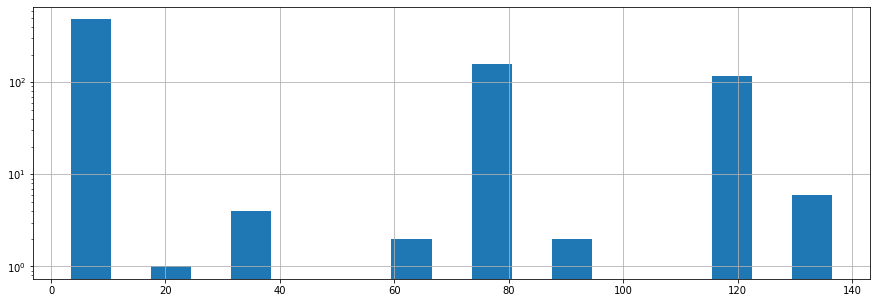

In [ ]:
# dropping columns 
df = df.replace(r'^\s*$', np.nan, regex=True)
nan_count = df.isna().sum()
nan_count.hist(figsize=(15,5), align="mid", histtype="bar", rwidth=0.5, log=True)

In [ ]:
2# # initially not dropping any info
# # The number of NaN to drop is determined by observation of the graph
# # The goal is to identify questions that were droped during the graph reduction, as well as comments
# max_nan = 20

# df = df.dropna(thresh=len(df) - max_nan, axis=1)

In [ ]:
nan_values = df.isna()
nan_columns = nan_values.any()
columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

["2. If your partner gave you their secret words please select your partner's secret word #1 from this list, otherwise select the first answer in this list and share it with your partner as your secret word #1. ", "3. If your partner gave you their secret words please select your partner's secret word #2 from this list, otherwise select the first answer in this list and share it with your partner as your secret word #2. ", "4. If your partner gave you their secret words please select your partner's secret word #3 from this list, otherwise select the first answer in this list and share it with your partner as your secret word #3. ", '9. In how many committed relationships have you been prior to your current relationship?', '10. In how many committed relationships have your partner been prior to your current relationship?', '17. Which of the following frameworks are you familiar with?', '18. Do you know your MBTI profile?', "19. Do you know your partner's MBTI profile?", '20. Do you know

In [ ]:
# retype_cols = {
#     COL["user_relationships"]: float,
#     COL["partner_relationships"]: float,
#     COL["satisfaction"]: float,
#     COL["children_number"]: float,
#     COL["user_gender"]: float,
#     COL["partner_gender"]: float
# }

# df = df.replace(r'^\s*$', np.nan, regex=True)
# df = df.astype(retype_cols)


In [ ]:
print(df[COL["user_country"]].unique())

['FR' 'CM' 'CO' 'US' 'JP' 'TN' 'CA' 'MX' 'IN' 'AE' 'FG' 'UK' 'NC' 'GA'
 'NL' 'PT' 'GE']


In [ ]:
# ... experiment adding all the required data only for modeling...

demographic_cols = [
                   COL['user_age'],
                   COL['partner_age'],
                   COL['user_gender'],
                   COL['partner_gender'],
                   COL['duration'],
                   COL['user_relationships'],
                   COL["partner_relationships"],
                   COL["satisfaction"],
                   COL['user_country'],
                   COL['partner_country'],
                   COL["children_number"]
]


# Columns for the features
X_cols = COL["assertions"]

# Columns for the predictions
Y_cols = COL["tips"]

# Build a dataset with only the needed features
ds = df[demographic_cols + X_cols + Y_cols]

ds = ds.fillna(value=0)  # ... represent no interest in the question. (nutral effect)

ds

,5. What is your age?,6. What is your partner's age?,7. What is your gender? [Me],7. What is your gender? [My partner],8. How long have you been in your current relationship?,9. In how many committed relationships have you been prior to your current relationship?,10. In how many committed relationships have your partner been prior to your current relationship?,11. How would you rate your current relationship satisfaction?,"12. In which country do you currently reside (US, UK, FR...)?","13. In which country does your partner currently reside (US, UK, FR...)?",22. How many children do you have in total?,7. What is your gender? [Me],7. What is your gender? [My partner],1. I don't like to be micro controlled or told what to do. [Me],1. I don't like to be micro controlled or told what to do. [My partner],1. I don't like to be micro controlled or told what to do. [It is an issue in our relationship],2. I am sometimes told that I am smoky or hazy. [Me],2. I am sometimes told that I am smoky or hazy. [My partner],2. I am sometimes told that I am smoky or hazy. [It is an issue in our relationship],3. I like to use metaphors or analogies when I speak. [Me],3. I like to use metaphors or analogies when I speak. [My partner],3. I like to use metaphors or analogies when I speak. [It is an issue in our relationship],4. I have many friends and relations. [Me],4. I have many friends and relations. [My partner],4. I have many friends and relations. [It is an issue in our relationship],5. I am often down and sad. [Me],5. I am often down and sad. [My partner],5. I am often down and sad. [It is an issue in our relationship],6. I often keep myself in a self-effacing role or in positions below my abilities. [Me],6. I often keep myself in a self-effacing role or in positions below my abilities. [My partner],6. I often keep myself in a self-effacing role or in positions below my abilities. [It is an issue in our relationship],7. I like to do things manually and see the result quickly. [Me],7. I like to do things manually and see the result quickly. [My partner],7. I like to do things manually and see the result quickly. [It is an issue in our relationship],8. I like to have flexible schedules that I can change whenever I want. [Me],8. I like to have flexible schedules that I can change whenever I want. [My partner],8. I like to have flexible schedules that I can change whenever I want. [It is an issue in our relationship],9. I am very comfortable in groups. [Me],9. I am very comfortable in groups. [My partner],9. I am very comfortable in groups. [It is an issue in our relationship],...,79. Be open to doing things on a whim. Plan time to do something unexpected. [I need to do this],79. Be open to doing things on a whim. Plan time to do something unexpected. [My partner needs to do this],80. Try to adapt your plans or give up what you are doing to participate in a spontaneous activity that your partner enjoys. [I need to do this],80. Try to adapt your plans or give up what you are doing to participate in a spontaneous activity that your partner enjoys. [My partner needs to do this],"81. To please your partner, suggest something new such as a new topic or a new activity. [I need to do this]","81. To please your partner, suggest something new such as a new topic or a new activity. [My partner needs to do this]",82. Try not to impose unnecessary schedules or obligations on your partner. [I need to do this],82. Try not to impose unnecessary schedules or obligations on your partner. [My partner needs to do this],39. Realize that your partner likes to mix work and play and to sprint at the end of a project. [I need to do this],39. Realize that your partner likes to mix work and play and to sprint at the end of a project. [My partner needs to do this],"84. Be direct in expressing your needs and feelings, don't pull back or expect your partner to guess what's bothering you. Be explicit. [I need to do this]","84. Be direct in expressing your needs and feelings, 

In [ ]:
# new data frame ds created now Spliting data:

# Input data  -> Demographic + Assertions
# Output data -> Tips


# Creating new data frame:

# ds

# separating [me], [My_patner], [Its an Issue] into separate columns in Assertions....(complicated not done yet)
# separating [I will follow tips], [my patner will follow tips] into separate coulumns in Tips...(not done)
# after correct formation of df_new--- Split data

# Spliting data into train + val + test -> 49% - 21% - 30%
from sklearn.model_seletion import train_test_split
Xtrain, Xtest, Ytrain, Ytest =

Xtrain, Xtest, Val_X, Val_Y =

# Encoding on Gender and Country

if not use_preset and ITEM_FEAT_COL is not None:
    # Encode 'country' into int array (multi-hot representation) to use as item features
    country_encoder = sklearn.preprocessing.MultiLabelBinarizer()
    data[ITEM_FEAT_COL] = country_encoder.fit_transform(
        data[ITEM_FEAT_COL].apply(lambda s: s.split("|"))
    ).tolist()
    print("country:", country_encoder.classes_)
    display(data.head())

# Fit_transform on Train and Transform on Test data

OneHot = 

# building NN recommendation system to predict K-tips for user and K-tips for Patner. K will be b/w 5-10



# model evaluation using Validation data with hyper-parameters optimisation.


# model Testing using Test data... (special recommendation testing to find accuracy of the model)


# Future model improvements:
# 1. Predicting personality of user and patner.
# 2. using two modles to predict assertions and tips respectively
# 3. need information on children age affect on relationship (kid, teenagers, infants at home).
# 4. [its an issue] values have to change the scale from 5 - 0 from strongly aggree to stongly disagree.(So, we give more importance to stongly agree to find right tip for it)

In [ ]:
# User_Country featurisation - One hot encoding and adding to df...

# importing one hot encoder 
from sklearn from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data.Country.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["Country_"+str(int(i)) for i in range(data.shape[1])]) 
df = pd.concat([data, dfOneHot], axis=1)
#droping the country column 
df= df.drop(['Country'], axis=1) 
#printing to verify 
print(df.head())

In [ ]:
# import torch.nn as nn
# import pytorch_lightning as pl
# from torch.utils.data import DataLoader

# class NCF(pl.LightningModule):
#     """ Neural Collaborative Filtering (NCF)
    
#         Args:
#             num_users (int): Number of unique users
#             num_items (int): Number of unique items
#             ratings (pd.DataFrame): Dataframe containing the movie ratings for training
#             all_movieIds (list): List containing all movieIds (train + test)
#     """
    
#     def __init__(self, num_users, num_items, ratings, all_movieIds):
#         super().__init__()
#         self.user_embedding = nn.Embedding(num_embeddings=num_users, embedding_dim=8)
#         self.item_embedding = nn.Embedding(num_embeddings=num_items, embedding_dim=8)
#         self.fc1 = nn.Linear(in_features=16, out_features=64)
#         self.fc2 = nn.Linear(in_features=64, out_features=32)
#         self.output = nn.Linear(in_features=32, out_features=1)
#         self.ratings = ratings
#         self.all_movieIds = all_movieIds
        
#     def forward(self, user_input, item_input):
        
#         # Pass through embedding layers
#         user_embedded = self.user_embedding(user_input)
#         item_embedded = self.item_embedding(item_input)

#         # Concat the two embedding layers
#         vector = torch.cat([user_embedded, item_embedded], dim=-1)

#         # Pass through dense layer
#         vector = nn.ReLU()(self.fc1(vector))
#         vector = nn.ReLU()(self.fc2(vector))

#         # Output layer
#         pred = nn.Sigmoid()(self.output(vector))

#         return pred
    
#     def training_step(self, batch, batch_idx):
#         user_input, item_input, labels = batch
#         predicted_labels = self(user_input, item_input)
#         loss = nn.BCELoss()(predicted_labels, labels.view(-1, 1).float())
#         return loss

#     def configure_optimizers(self):
#         return torch.optim.Adam(self.parameters())

#     def train_dataloader(self):
#         return DataLoader(MovieLensTrainDataset(self.ratings, self.all_movieIds),
#                           batch_size=512, num_workers=4)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
!pip install scrapbook

     |████████████████████████████████| 156 kB 34.3 MB/s 
     |████████████████████████████████| 129 kB 62.7 MB/s 
     |████████████████████████████████| 843 kB 62.1 MB/s 
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5


In [5]:
!python --version

Python 3.7.12


In [6]:
!pip install recommenders

     |████████████████████████████████| 314 kB 16.0 MB/s 
     |████████████████████████████████| 11.8 MB 37.4 MB/s 
     |████████████████████████████████| 636 kB 43.9 MB/s 
     |████████████████████████████████| 61 kB 7.9 MB/s 
     |████████████████████████████████| 22.3 MB 71.3 MB/s 
     |████████████████████████████████| 3.1 MB 37.4 MB/s 
     |████████████████████████████████| 59 kB 6.6 MB/s 
     |████████████████████████████████| 1.5 MB 42.7 MB/s 
     |████████████████████████████████| 12.4 MB 21.4 MB/s 
     |████████████████████████████████| 310 kB 58.7 MB/s 
     |████████████████████████████████| 93 kB 2.1 MB/s 
     |████████████████████████████████| 749 kB 53.0 MB/s 
     |████████████████████████████████| 61 kB 450 kB/s 
     |████████████████████████████████| 3.3 MB 27.7 MB/s 
     |████████████████████████████████| 895 kB 64.8 MB/s 
  Created wheel for lightfm: filename=lightfm-1.16-cp37-cp37m-linux_x86_64.whl size=705351 sha256=e37110cefbe8373422c21a11ed1c01b64b3c8

In [ ]:
import itertools
import math
import os
from tempfile import TemporaryDirectory

import numpy as np
import scrapbook as sb
import pandas as pd
import sklearn.preprocessing
import tensorflow as tf
tf.get_logger().setLevel('ERROR') # only show error messages

from recommenders.utils.constants import (
    DEFAULT_USER_COL as USER_COL,
    DEFAULT_Que_COL as Que_COL,
    DEFAULT_RATING_COL as RATING_COL,
    DEFAULT_PREDICTION_COL as PREDICT_COL,
    SEED
)
# from recommenders.utils import tf_utils, gpu_utils, plot
# from recommenders.datasets import movielens
from recommenders.datasets.pandas_df_utils import user_item_pairs
from recommenders.datasets.python_splitters import python_random_split
import recommenders.evaluation.python_evaluation as evaluator
import recommenders.models.wide_deep.wide_deep_utils as wide_deep

# print("Tensorflow Version:", tf.VERSION)
# print("GPUs:\n", gpu_utils.get_gpu_info())

In [ ]:
# Recommend top k items
TOP_K = 10

MOVIELENS_DATA_SIZE = '100k'
# Metrics to use for evaluation
RANKING_METRICS = [
    evaluator.ndcg_at_k.__name__,
    evaluator.precision_at_k.__name__,
]
RATING_METRICS = [
    evaluator.rmse.__name__,
    evaluator.mae.__name__,
]
# Use session hook to evaluate model while training
EVALUATE_WHILE_TRAINING = True
# Item feature column name
ITEM_FEAT_COL = 'country'

RANDOM_SEED = SEED  # Set seed for deterministic result

# Train and test set pickle file paths. If provided, use them. Otherwise, download the MovieLens dataset.
DATA_DIR = None
TRAIN_PICKLE_PATH = None
TEST_PICKLE_PATH = None
EXPORT_DIR_BASE = './outputs/model'
# Model checkpoints directory. If None, use temp-dir.
MODEL_DIR = None

#### Hyperparameters
MODEL_TYPE = 'wide_deep'
STEPS = 50000  # Number of batches to train
BATCH_SIZE = 32
# Wide (linear) model hyperparameters
LINEAR_OPTIMIZER = 'adagrad'
LINEAR_OPTIMIZER_LR = 0.0621  # Learning rate
LINEAR_L1_REG = 0.0           # Regularization rate for FtrlOptimizer
LINEAR_L2_REG = 0.0
LINEAR_MOMENTUM = 0.0         # Momentum for MomentumOptimizer or RMSPropOptimizer
# DNN model hyperparameters
DNN_OPTIMIZER = 'adadelta'
DNN_OPTIMIZER_LR = 0.1
DNN_L1_REG = 0.0           # Regularization rate for FtrlOptimizer
DNN_L2_REG = 0.0
DNN_MOMENTUM = 0.0         # Momentum for MomentumOptimizer or RMSPropOptimizer
# Layer dimensions. Defined as follows to make this notebook runnable from Hyperparameter tuning services like AzureML Hyperdrive
DNN_HIDDEN_LAYER_1 = 0     # Set 0 to not use this layer
DNN_HIDDEN_LAYER_2 = 64    # Set 0 to not use this layer
DNN_HIDDEN_LAYER_3 = 128   # Set 0 to not use this layer
DNN_HIDDEN_LAYER_4 = 512   # Note, at least one layer should have nodes.
DNN_HIDDEN_UNITS = [h for h in [DNN_HIDDEN_LAYER_1, DNN_HIDDEN_LAYER_2, DNN_HIDDEN_LAYER_3, DNN_HIDDEN_LAYER_4] if h > 0]
DNN_USER_DIM = 32          # User embedding feature dimension
DNN_ITEM_DIM = 16          # Item embedding feature dimension
DNN_DROPOUT = 0.8
DNN_BATCH_NORM = 1         # 1 to use batch normalization, 0 if not.

In [ ]:
if MODEL_DIR is None:
    TMP_DIR = TemporaryDirectory()
    model_dir = TMP_DIR.name
else:
    if os.path.exists(MODEL_DIR) and os.listdir(MODEL_DIR):
        raise ValueError(
            "Model exists in {}. Use different directory name or "
            "remove the existing checkpoint files first".format(MODEL_DIR)
        )
    TMP_DIR = None
    model_dir = MODEL_DIR

In [ ]:
# Prepare Data:

use_preset = (TRAIN_PICKLE_PATH is not None and TEST_PICKLE_PATH is not None)
if not use_preset:
    # The country of each movie are returned as '|' separated string, e.g. "Animation|Children's|Comedy".
    data = movielens.load_pandas_df(
        size=MOVIELENS_DATA_SIZE,
        header=[USER_COL, Que_COL, RATING_COL],
        country_col=ITEM_FEAT_COL
    )
    display(data.head())

In [ ]:
# Encode Item Features:

if not use_preset and ITEM_FEAT_COL is not None:
    # Encode 'country' into int array (multi-hot representation) to use as item features
    country_encoder = sklearn.preprocessing.MultiLabelBinarizer()
    data[ITEM_FEAT_COL] = country_encoder.fit_transform(
        data[ITEM_FEAT_COL].apply(lambda s: s.split("|"))
    ).tolist()
    print("country:", country_encoder.classes_)
    display(data.head())

In [ ]:
# Train and Test Split:
if not use_preset:
    train, test = python_random_split(data, ratio=0.75, seed=RANDOM_SEED)
else:
    train = pd.read_pickle(path=TRAIN_PICKLE_PATH if DATA_DIR is None else os.path.join(DATA_DIR, TRAIN_PICKLE_PATH))
    test = pd.read_pickle(path=TEST_PICKLE_PATH if DATA_DIR is None else os.path.join(DATA_DIR, TEST_PICKLE_PATH))
    data = pd.concat([train, test])

print("{} train samples and {} test samples".format(len(train), len(test)))

In [ ]:
# Unique items in the dataset
if ITEM_FEAT_COL is None:
    items = data.drop_duplicates(Que_COL)[[Que_COL]].reset_index(drop=True)
    item_feat_shape = None
else:
    items = data.drop_duplicates(Que_COL)[[Que_COL, ITEM_FEAT_COL]].reset_index(drop=True)
    item_feat_shape = len(items[ITEM_FEAT_COL][0])
# Unique users in the dataset
users = data.drop_duplicates(USER_COL)[[USER_COL]].reset_index(drop=True)

print("Total {} items and {} users in the dataset".format(len(items), len(users)))

In [ ]:
# Build Model:
# https://github.com/saikiransingh007/recommenders/blob/main/examples/00_quick_start/wide_deep_movielens.ipynb

# Create model checkpoint every n steps. We store the model 5 times.
save_checkpoints_steps = max(1, STEPS // 5)

# Define wide (linear) and deep (dnn) features
wide_columns, deep_columns = wide_deep.build_feature_columns(
    users=users[USER_COL].values,
    items=items[Que_COL].values,
    user_col=USER_COL,
    item_col=Que_COL,
    item_feat_col=ITEM_FEAT_COL,
    crossed_feat_dim=1000,
    user_dim=DNN_USER_DIM,
    item_dim=DNN_ITEM_DIM,
    item_feat_shape=item_feat_shape,
    model_type=MODEL_TYPE,
)

print("Wide feature specs:")
for c in wide_columns:
    print("\t", str(c)[:100], "...")
print("Deep feature specs:")
for c in deep_columns:
    print("\t", str(c)[:100], "...")


In [ ]:
# Build a model based on the parameters
model = wide_deep.build_model(
    model_dir=model_dir,
    wide_columns=wide_columns,
    deep_columns=deep_columns,
    linear_optimizer=tf_utils.build_optimizer(LINEAR_OPTIMIZER, LINEAR_OPTIMIZER_LR, **{
        'l1_regularization_strength': LINEAR_L1_REG,
        'l2_regularization_strength': LINEAR_L2_REG,
        'momentum': LINEAR_MOMENTUM,
    }),
    dnn_optimizer=tf_utils.build_optimizer(DNN_OPTIMIZER, DNN_OPTIMIZER_LR, **{
        'l1_regularization_strength': DNN_L1_REG,
        'l2_regularization_strength': DNN_L2_REG,
        'momentum': DNN_MOMENTUM,  
    }),
    dnn_hidden_units=DNN_HIDDEN_UNITS,
    dnn_dropout=DNN_DROPOUT,
    dnn_batch_norm=(DNN_BATCH_NORM==1),
    log_every_n_iter=max(1, STEPS//10),  # log 10 times
    save_checkpoints_steps=save_checkpoints_steps,
    seed=RANDOM_SEED
)

In [ ]:
# Train and Evaluate Model:

cols = {
    'col_user': USER_COL,
    'col_item': Que_COL,
    'col_rating': RATING_COL,
    'col_prediction': PREDICT_COL,
}

# Prepare ranking evaluation set, i.e. get the cross join of all user-item pairs
ranking_pool = user_item_pairs(
    user_df=users,
    item_df=items,
    user_col=USER_COL,
    item_col=Que_COL,
    user_item_filter_df=train,  # Remove seen items
    shuffle=True,
    seed=RANDOM_SEED
)

In [ ]:
# Define training hooks to track performance while training
hooks = []
if EVALUATE_WHILE_TRAINING:
    evaluation_logger = tf_utils.MetricsLogger()
    for metrics in (RANKING_METRICS, RATING_METRICS):
        if len(metrics) > 0:
            hooks.append(
                tf_utils.evaluation_log_hook(
                    model,
                    logger=evaluation_logger,
                    true_df=test,
                    y_col=RATING_COL,
                    eval_df=ranking_pool if metrics==RANKING_METRICS else test.drop(RATING_COL, axis=1),
                    every_n_iter=save_checkpoints_steps,
                    model_dir=model_dir,
                    eval_fns=[evaluator.metrics[m] for m in metrics],
                    **({**cols, 'k': TOP_K} if metrics==RANKING_METRICS else cols)
                )
            )

# Define training input (sample feeding) function
train_fn = tf_utils.pandas_input_fn(
    df=train,
    y_col=RATING_COL,
    batch_size=BATCH_SIZE,
    num_epochs=None,  # We use steps=TRAIN_STEPS instead.
    shuffle=True,
    seed=RANDOM_SEED,
)

In [ ]:
print(
    "Training steps = {}, Batch size = {} (num epochs = {})"
    .format(STEPS, BATCH_SIZE, (STEPS*BATCH_SIZE)//len(train))
)
tf.logging.set_verbosity(tf.logging.INFO)

try:
    model.train(
        input_fn=train_fn,
        hooks=hooks,
        steps=STEPS
    )
except tf.train.NanLossDuringTrainingError:
    import warnings
    warnings.warn(
        "Training stopped with NanLossDuringTrainingError. "
        "Try other optimizers, smaller batch size and/or smaller learning rate."
    )

In [ ]:
if EVALUATE_WHILE_TRAINING:
    logs = evaluation_logger.get_log()
    for i, (m, v) in enumerate(logs.items(), 1):
        sb.glue("eval_{}".format(m), v)
        x = [save_checkpoints_steps*i for i in range(1, len(v)+1)]
        plot.line_graph(
            values=list(zip(v, x)),
            labels=m,
            x_name="steps",
            y_name=m,
            subplot=(math.ceil(len(logs)/2), 2, i),
        )